In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 
from IPython.display import display
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.datasets import load_files
%matplotlib 
%matplotlib inline
%run jasmine.py

Using matplotlib backend: Qt5Agg


In [31]:
#Loading experiment title/description from data folder
dataset=load_files('data')

In [32]:
#Extracting Experiment IDs from file names data//no//exp_ID --> exp_ID
print type(dataset.filenames)

exp_IDs = []

for fn in dataset.filenames: 
    if "yes" not in fn:
        id=fn.replace('data\\no\\','')
        
    else: 
        id=fn.replace('data\\yes\\','')
       
    exp_IDs.append(id)

<type 'numpy.ndarray'>


In [33]:
#splitting 'yes'/'no' files ramdomly into training and test set
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import StratifiedShuffleSplit

file_names_train, file_names_test,docs_train, docs_test, y_train, y_test =train_test_split(exp_IDs, dataset.data, dataset.target,test_size=0.25, train_size=0.75,random_state=10)
print "Number of Experiments: %d" %(len(dataset.filenames))
print
print "Number of Training Experiments: %d" % (len(docs_train))
print "Yes count: %d" % (y_train.tolist()).count(1)
print "No count: %d" % (y_train.tolist()).count(0)
print 
print "Number of Test Experiments: %d" % (len(docs_test))
print "Yes count: %d" % (y_test.tolist()).count(1)
print "No count: %d" % (y_test.tolist()).count(0)

Number of Experiments: 2379

Number of Training Experiments: 1784
Yes count: 352
No count: 1432

Number of Test Experiments: 595
Yes count: 134
No count: 461


# TFIDF VECTORIZER w/ beta=4

In [34]:
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import mglearn




clf=Pipeline([('cvect',TfidfVectorizer(strip_accents='ascii',token_pattern=u'(?u)\\b([a-z_]\w+)\\b',stop_words="english")),
              ('stdsclr',StandardScaler(copy=True,with_mean=False, with_std=True)),
              ('log',LogisticRegression()),
])

parameters={ 'cvect__ngram_range':[(1,1),(1,2),(1,3)],
             'cvect__min_df':[2],
             'cvect__max_df':[.98],
            }

beta=4
f_scorer=make_f_scorer(beta)

#Running GridSearch
gs_clf=GridSearchCV(clf,parameters,scoring=f_scorer,n_jobs=-1,verbose=1)
gs_clf=gs_clf.fit(docs_train,y_train)
trainedCLF=gs_clf.best_estimator_
vectorizer=gs_clf.best_estimator_.named_steps["cvect"]

print ("SGD Classifier with Tfidf Vectorizer: \n")
for param_name in sorted(parameters.keys()):
    print("%s:%r"%(param_name,gs_clf.best_params_[param_name]))
    print("\n")

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   22.1s finished


SGD Classifier with Tfidf Vectorizer: 

cvect__max_df:0.98


cvect__min_df:2


cvect__ngram_range:(1, 1)




In [35]:
vectorizer=gs_clf.best_estimator_.named_steps["cvect"]
y_test_predicted=trainedCLF.predict(docs_test)
y_train_predicted=trainedCLF.predict(docs_train)
vectorizer=gs_clf.best_estimator_.named_steps["cvect"]
print results(y_test,y_test_predicted,y_train,y_train_predicted,beta)

Test Set Classification Report & Confusion Matrix: 

             precision    recall  f1-score   support

        yes       0.72      0.69      0.70       134
         no       0.91      0.92      0.92       461

avg / total       0.87      0.87      0.87       595

F 4: 0.688


[[ 92  42]
 [ 36 425]]


Training Set Classification Report & Confusion Matrix: 

             precision    recall  f1-score   support

        yes       1.00      1.00      1.00       352
         no       1.00      1.00      1.00      1432

avg / total       1.00      1.00      1.00      1784

F 4: 1.000
[[ 352    0]
 [   0 1432]]
None


In [36]:
%run jasmine.py
feature_names=np.array(vectorizer.get_feature_names())
print ("Number of Features: %d\n" % len(feature_names))
print  ("First ten features: {}\n".format(feature_names[0:10]))
middle_ten =len(feature_names)/2 +10 
print ("Middle ten features: {} \n".format(feature_names[len(feature_names)/2: middle_ten]))
print  ("Last ten features: {}\n".format(feature_names[-10:]))
print falselyReported(y_test, y_test_predicted, file_names_test)

Number of Features: 5322

First ten features: [u'a2' u'a_x0080__x0093_' u'a_x0084_s' u'a_x0088__x0092_' u'a_x0089_1'
 u'aa' u'aa4' u'abdominal' u'aberrant' u'aberrations']

Middle ten features: [u'ldb1' u'ldlr' u'ldp' u'lead' u'leading' u'leads' u'lean' u'learning'
 u'lectin' u'led'] 

Last ten features: [u'yy1' u'zebrafish' u'zinc' u'zone' u'zones' u'zooepidemicus' u'zscan4'
 u'zt20' u'zt6' u'zygotic']

total count:  78

Number of False Positves:  36
['E-GEOD-57311', 'E-GEOD-31013', 'E-GEOD-2882', 'E-GEOD-9033', 'E-GEOD-47395', 'E-GEOD-11897', 'E-GEOD-15729', 'E-GEOD-42604', 'E-GEOD-10628', 'E-GEOD-5371', 'E-GEOD-13865']

Number of False Negatives:  42
['E-GEOD-59460', 'E-MTAB-599', 'E-GEOD-42895', 'E-GEOD-33979', 'E-GEOD-65617', 'E-ERAD-283', 'E-GEOD-55966', 'E-GEOD-31234', 'E-GEOD-49906', 'E-GEOD-3100', 'E-GEOD-67525']
None


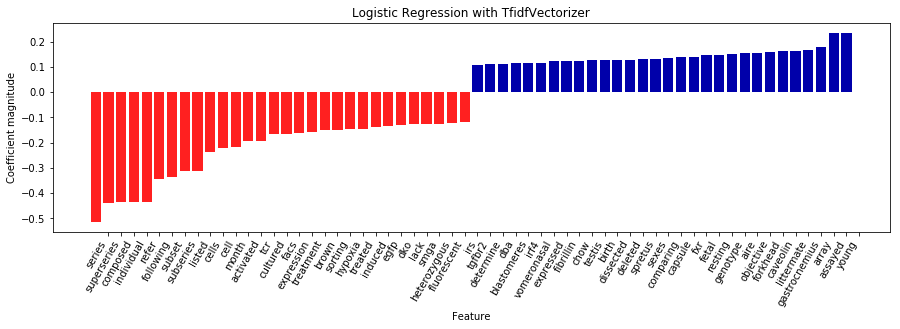

In [37]:
mglearn.tools.visualize_coefficients(
    trainedCLF.named_steps["log"].coef_, 
    feature_names, n_top_features=30
)
plt.title("Logistic Regression with TfidfVectorizer")

# TFIDF VECTORIZER w/ beta=2 

In [38]:
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import mglearn




clf=Pipeline([('cvect',TfidfVectorizer(strip_accents='ascii',token_pattern=u'(?u)\\b([a-z_]\w+)\\b',stop_words="english")),
              ('stdsclr',StandardScaler(copy=True,with_mean=False, with_std=True)),
              ('log',LogisticRegression()),
])

parameters={ 'cvect__ngram_range':[(1,1),(1,2),(1,3)],
             'cvect__min_df':[2],
             'cvect__max_df':[.98],
            }

beta=2
f_scorer=make_f_scorer(beta)

#Running GridSearch
gs_clf=GridSearchCV(clf,parameters,scoring=f_scorer,n_jobs=-1,verbose=1)
gs_clf=gs_clf.fit(docs_train,y_train)
trainedCLF=gs_clf.best_estimator_
vectorizer=gs_clf.best_estimator_.named_steps["cvect"]

print ("SGD Classifier with Tfidf Vectorizer: \n")
for param_name in sorted(parameters.keys()):
    print("%s:%r"%(param_name,gs_clf.best_params_[param_name]))
    print("\n")

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   19.7s finished


SGD Classifier with Tfidf Vectorizer: 

cvect__max_df:0.98


cvect__min_df:2


cvect__ngram_range:(1, 1)




In [39]:
#vectorizer=gs_clf.best_estimator_.named_steps["cvect"]
y_test_predicted=trainedCLF.predict(docs_test)
y_train_predicted=trainedCLF.predict(docs_train)
#vectorizer=gs_clf.best_estimator_.named_steps["cvect"]
print results(y_test,y_test_predicted,y_train,y_train_predicted,beta)

Test Set Classification Report & Confusion Matrix: 

             precision    recall  f1-score   support

        yes       0.72      0.69      0.70       134
         no       0.91      0.92      0.92       461

avg / total       0.87      0.87      0.87       595

F 2: 0.693


[[ 92  42]
 [ 36 425]]


Training Set Classification Report & Confusion Matrix: 

             precision    recall  f1-score   support

        yes       1.00      1.00      1.00       352
         no       1.00      1.00      1.00      1432

avg / total       1.00      1.00      1.00      1784

F 2: 1.000
[[ 352    0]
 [   0 1432]]
None


In [40]:
feature_names=np.array(vectorizer.get_feature_names())
print ("Number of Features: %d\n" % len(feature_names))
print  ("First ten features: {}\n".format(feature_names[0:10]))
middle_ten =len(feature_names)/2 +10 
print ("Middle ten features: {} \n".format(feature_names[len(feature_names)/2: middle_ten]))
print  ("Last ten features: {}\n".format(feature_names[-10:]))

print falselyReported(y_test, y_test_predicted, file_names_test)

Number of Features: 5322

First ten features: [u'a2' u'a_x0080__x0093_' u'a_x0084_s' u'a_x0088__x0092_' u'a_x0089_1'
 u'aa' u'aa4' u'abdominal' u'aberrant' u'aberrations']

Middle ten features: [u'ldb1' u'ldlr' u'ldp' u'lead' u'leading' u'leads' u'lean' u'learning'
 u'lectin' u'led'] 

Last ten features: [u'yy1' u'zebrafish' u'zinc' u'zone' u'zones' u'zooepidemicus' u'zscan4'
 u'zt20' u'zt6' u'zygotic']

total count:  78

Number of False Positves:  36
['E-GEOD-57311', 'E-GEOD-31013', 'E-GEOD-2882', 'E-GEOD-9033', 'E-GEOD-47395', 'E-GEOD-11897', 'E-GEOD-15729', 'E-GEOD-42604', 'E-GEOD-10628', 'E-GEOD-5371', 'E-GEOD-13865']

Number of False Negatives:  42
['E-GEOD-59460', 'E-MTAB-599', 'E-GEOD-42895', 'E-GEOD-33979', 'E-GEOD-65617', 'E-ERAD-283', 'E-GEOD-55966', 'E-GEOD-31234', 'E-GEOD-49906', 'E-GEOD-3100', 'E-GEOD-67525']
None


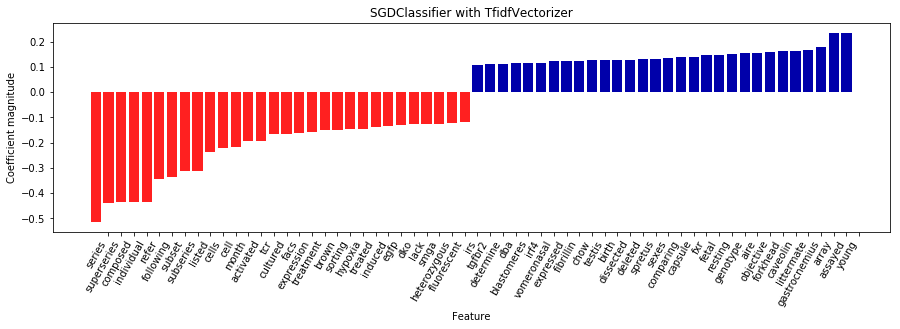

In [41]:
mglearn.tools.visualize_coefficients(
    trainedCLF.named_steps["log"].coef_, 
    feature_names, n_top_features=30
)
plt.title("SGDClassifier with TfidfVectorizer")

# TFIDF VECTORIZER W/ MaxAbsScaler 

In [51]:
#SGD Classifier with Tfidf Vectorizer 
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import mglearn
from sklearn.preprocessing import MaxAbsScaler
from sklearn import preprocessing




clf=Pipeline([('vect',TfidfVectorizer(strip_accents='ascii',token_pattern=u'(?u)\\b([a-z_]\w+)\\b',stop_words="english")),
              ('mas',MaxAbsScaler()),
             ('log',LogisticRegression(class_weight='balanced')),
])

parameters={ 'vect__ngram_range':[(1,1),(1,2),(1,3)],
             'vect__min_df':[1,5,10],
             'vect__max_df':[.9,.95],
             'vect__max_features': (5000, 10000,12000),
             'vect__ngram_range':[(1,1),(1,2),(1,3),(1,4)],
             'log__penalty':['l2','l1'],
             'log__C': [ .01, .1, 1, 10, 100],
             
           }

beta=4
f_scorer=make_f_scorer(beta)

#Running GridSearch
gs_clf=GridSearchCV(clf,parameters,scoring=f_scorer,n_jobs=-1)
gs_clf=gs_clf.fit(docs_train,y_train)
trainedCLF=gs_clf.best_estimator_
vectorizer=gs_clf.best_estimator_.named_steps["vect"]

print ("SGD Classifier with Tfidf Vectorizer: \n")
for param_name in sorted(parameters.keys()):
    print("%s:%r"%(param_name,gs_clf.best_params_[param_name]))
    print("\n")

SGD Classifier with Tfidf Vectorizer: 

log__C:0.01


log__penalty:'l2'


vect__max_df:0.9


vect__max_features:10000


vect__min_df:1


vect__ngram_range:(1, 1)




In [43]:
vectorizer=gs_clf.best_estimator_.named_steps["vect"]
y_test_predicted=trainedCLF.predict(docs_test)
y_train_predicted=trainedCLF.predict(docs_train)
vectorizer=gs_clf.best_estimator_.named_steps["vect"]
for param_name in sorted(parameters.keys()):
    print("%s:%r"%(param_name,gs_clf.best_params_[param_name]))
    print("\n")
print results(y_test,y_test_predicted,y_train,y_train_predicted,beta)

log__penalty:'l2'


vect__max_df:0.9


vect__max_features:10000


vect__min_df:1


vect__ngram_range:(1, 3)


Test Set Classification Report & Confusion Matrix: 

             precision    recall  f1-score   support

        yes       0.77      0.75      0.76       134
         no       0.93      0.93      0.93       461

avg / total       0.89      0.89      0.89       595

F 4: 0.755


[[101  33]
 [ 30 431]]


Training Set Classification Report & Confusion Matrix: 

             precision    recall  f1-score   support

        yes       1.00      1.00      1.00       352
         no       1.00      1.00      1.00      1432

avg / total       1.00      1.00      1.00      1784

F 4: 1.000
[[ 352    0]
 [   0 1432]]
None


In [44]:
feature_names=np.array(vectorizer.get_feature_names())
print ("Number of Features:%d\n" % len(feature_names))
print  ("First ten features: {}\n".format(feature_names[0:10]))
middle_ten =len(feature_names)/2 +10 
print ("Middle ten features: {} \n".format(feature_names[len(feature_names)/2: middle_ten]))
print  ("First ten features: {}\n".format(feature_names[-10:]))

print falselyReported(y_test, y_test_predicted, file_names_test)

Number of Features:10000

First ten features: [u'0st' u'1_0' u'1alpha' u'1beta' u'1i2' u'2i3' u'3t3' u'3t3 adipocyte'
 u'3t3 adipocyte differentiation' u'3t3 cells']

Middle ten features: [u'lcm plus' u'lcm plus microarray' u'lcmv' u'lcs' u'ldb1' u'ldlr' u'ldp'
 u'lead' u'leading' u'leads'] 

First ten features: [u'young old' u'yy1' u'zbtb20' u'zebrafish' u'zinc' u'zinc finger' u'zone'
 u'zones' u'zooepidemicus' u'zscan4']

total count:  63

Number of False Positves:  30
['E-GEOD-38001', 'E-GEOD-2882', 'E-GEOD-9033', 'E-GEOD-47395', 'E-GEOD-10628', 'E-MARS-9', 'E-GEOD-5371', 'E-GEOD-49975', 'E-GEOD-6461', 'E-GEOD-47401', 'E-GEOD-53156']

Number of False Negatives:  33
['E-GEOD-2336', 'E-GEOD-54785', 'E-MTAB-4644', 'E-GEOD-61582', 'E-GEOD-4675', 'E-GEOD-33979', 'E-SMDB-3845', 'E-GEOD-97', 'E-ERAD-283', 'E-GEOD-31234', 'E-GEOD-3100']
None


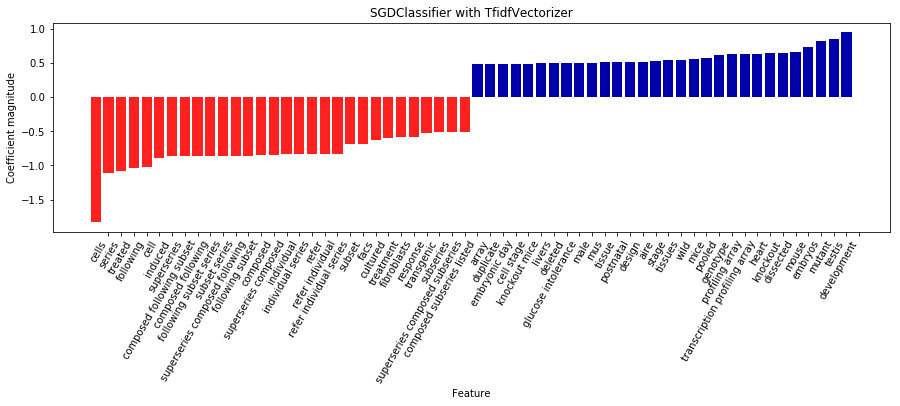

In [45]:
mglearn.tools.visualize_coefficients(
    trainedCLF.named_steps["log"].coef_, 
    feature_names, n_top_features=30
)
plt.title("SGDClassifier with TfidfVectorizer")